**Import the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

**Load the datset**

In [ ]:
df=pd.read_csv('dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
df.shape

(11430, 89)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
df.isnull().any()

url                False
length_url         False
length_hostname    False
ip                 False
nb_dots            False
                   ...  
web_traffic        False
dns_record         False
google_index       False
page_rank          False
status             False
Length: 89, dtype: bool

In [ ]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [ ]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


**Visualization**

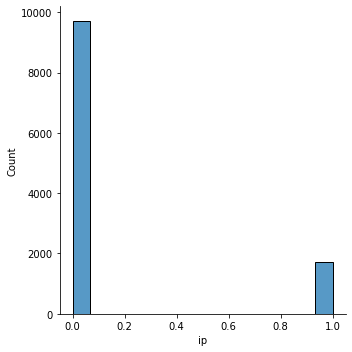

In [ ]:
sns.displot(df.ip)

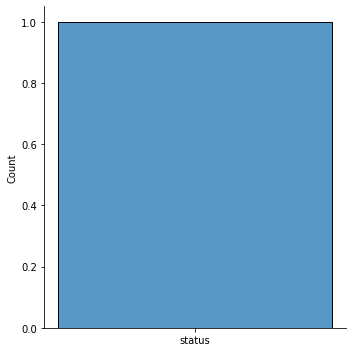

In [ ]:
sns.displot('status')

Text(0.5, 1.0, 'status')

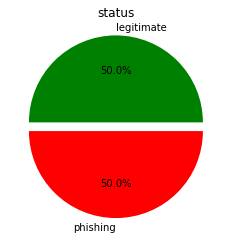

In [ ]:
plt.pie(df.status.value_counts(),[0.1,0],labels=['legitimate','phishing'],autopct="%1.1f%%",colors=['green','red'])
plt.title('status')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


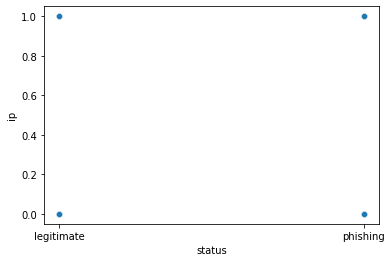

In [ ]:
sns.scatterplot(df.status,df.ip)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


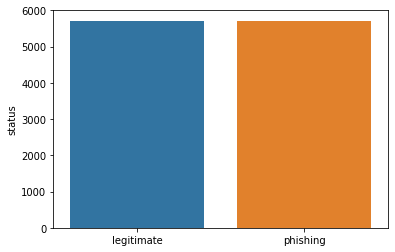

In [ ]:
sns.barplot(df.status.value_counts().index,df.status.value_counts())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f884c735bd0>,
      dtype=object)

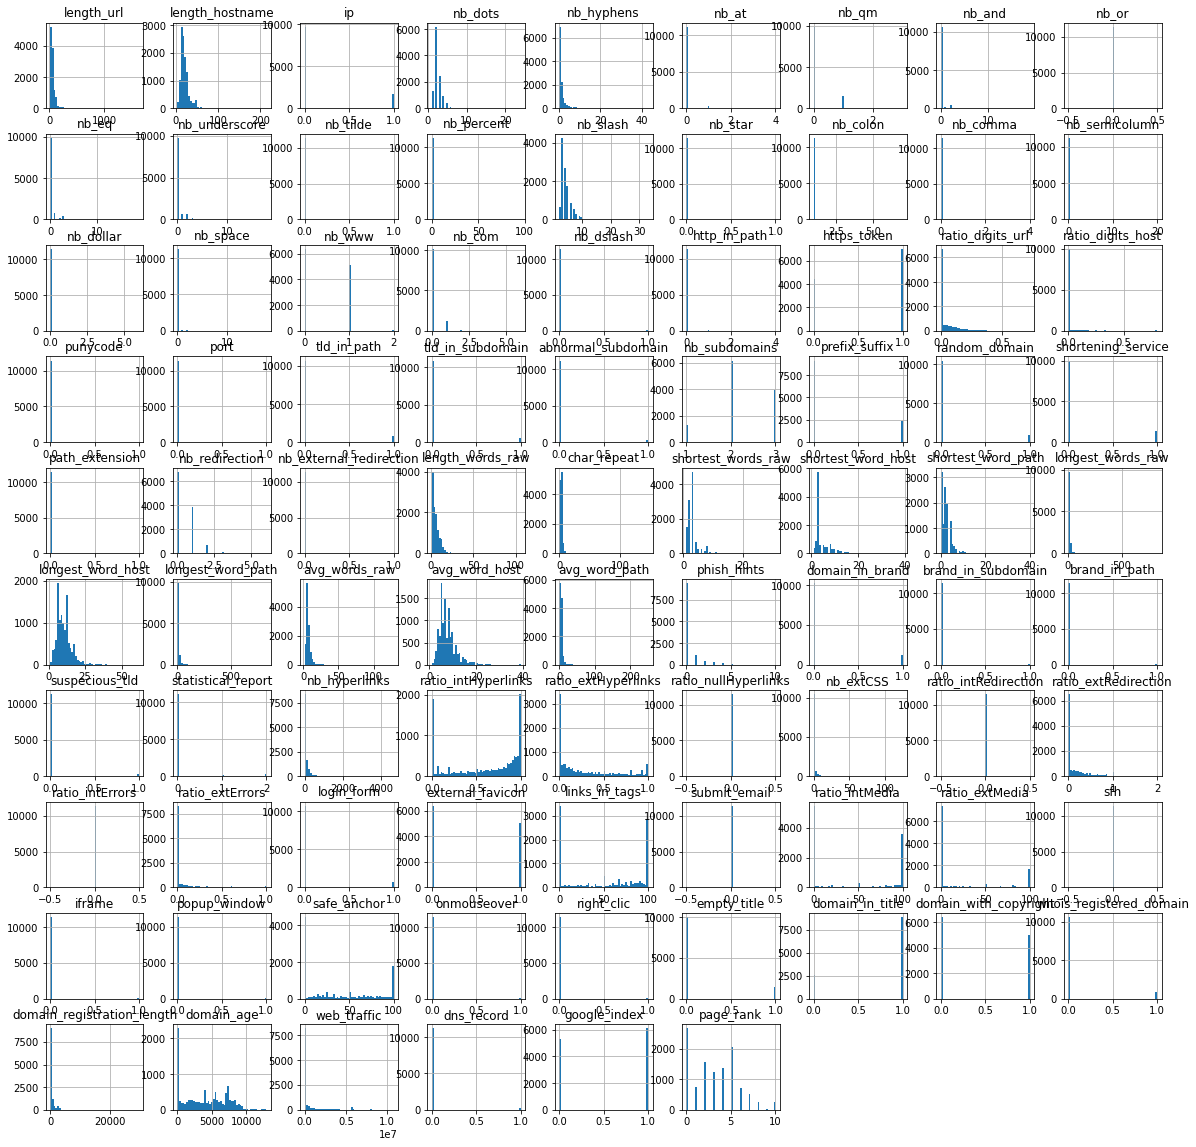

In [ ]:
df.hist(bins=50,figsize=(20,20))

**Outlier detection**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


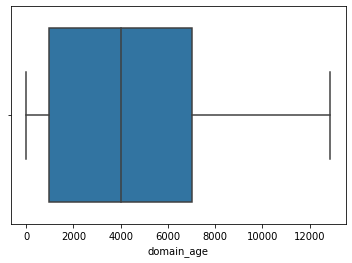

In [ ]:
sns.boxplot(df.domain_age)

**Handling ouliers**

In [ ]:
q1=df.domain_age.quantile(0.25)
q3=df.domain_age.quantile(0.75)

In [ ]:
IQR=q3-q1

In [ ]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [ ]:
upper_limit

16108.5

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


length_url           47.0
length_hostname      19.0
ip                    0.0
nb_dots               2.0
nb_hyphens            0.0
                    ...  
domain_age         3993.0
web_traffic        1651.0
dns_record            0.0
google_index          1.0
page_rank             3.0
Length: 87, dtype: float64

In [ ]:
df['domain_age']=np.where(df['domain_age']>upper_limit,30,df['domain_age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


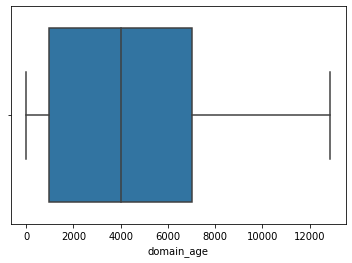

In [ ]:
sns.boxplot(df.domain_age)

In [ ]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


**Encoding Techniques**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df.status=le.fit_transform(df.status)
df.url=le.fit_transform(df.url)

In [ ]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,4501,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,3063,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,8984,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,2778,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,5261,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [ ]:
df.corr()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
url,1.000000,-0.036597,-0.044577,-0.066664,-0.028000,0.037406,-0.026399,0.034573,0.008760,NaN,...,-0.223133,0.080432,-0.083426,0.114034,0.116118,0.030854,-0.160667,-0.277465,0.279492,-0.290971
length_url,-0.036597,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,-0.044577,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,-0.066664,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,-0.028000,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.030854,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,-0.160667,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,-0.277465,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,0.279492,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


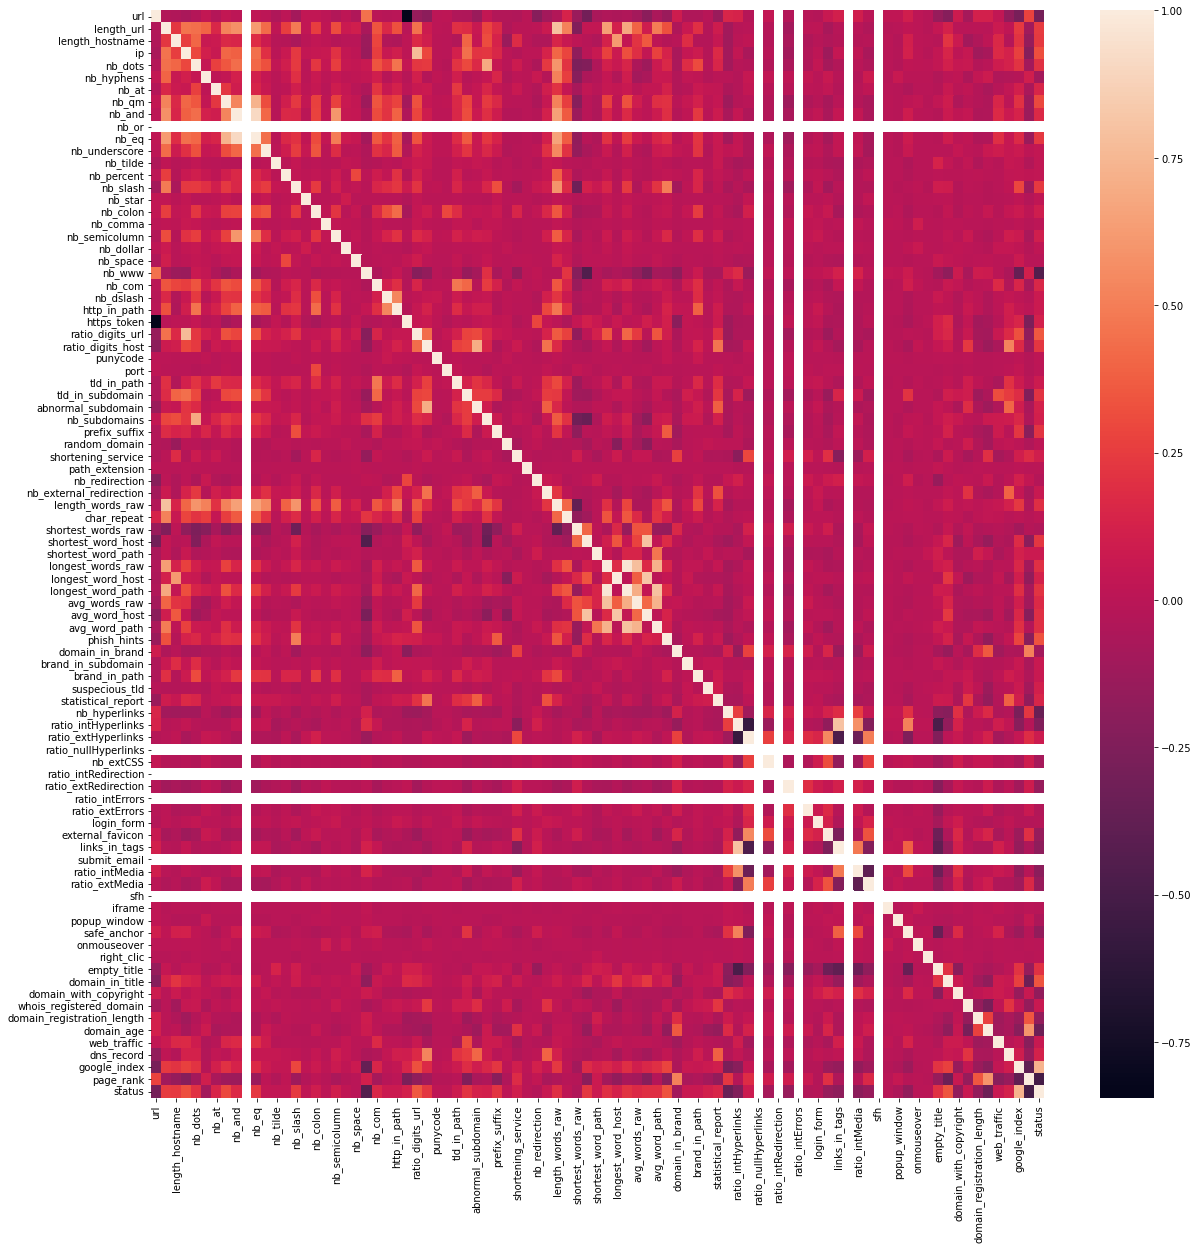

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

**X and y split**

In [59]:
y=df['status']
y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [58]:
X=df.iloc[:,:-1]
X.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,4501,37,19,0,3,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,3063,77,23,1,1,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,8984,126,50,1,4,1,0,1,2,0,...,0,1,0,0,14,4004,5828815,0,1,0
3,2778,18,11,0,2,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,5261,55,15,0,2,2,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6


**Scaling**

In [60]:
from sklearn.preprocessing import scale

In [61]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,-0.367518,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,0.0,...,-0.377549,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974
1,-0.803354,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,0.0,...,-0.377549,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407
2,0.991209,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,0.0,...,-0.377549,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788
3,-0.889733,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,0.0,...,-0.377549,0.537498,-0.885587,-0.28037,-0.528433,-1.307594,-0.375359,-0.143303,-1.070361,-0.073217
4,-0.137174,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,0.0,...,-0.377549,-1.860473,1.129194,-0.28037,-0.329595,1.323334,-0.424968,-0.143303,-1.070361,1.109355


**Train test split**

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [63]:
x_train.shape

(8001, 88)

In [64]:
x_test.shape

(3429, 88)

In [65]:
y_train.shape

(8001,)

In [66]:
y_test.shape

(3429,)

**Model building**

In [67]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [68]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [69]:
y_predict= model.predict(x_test)
y_predict

array([0, 1, 1, ..., 0, 1, 0])

In [70]:
y_predict_train = model.predict(x_train)

**Evaluating the model**

In [71]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [72]:
print('Testing accuracy =',accuracy_score(y_test,y_predict))
print('Training accuracy =',accuracy_score(y_train,y_predict_train))

Testing accuracy = 0.9212598425196851
Training accuracy = 0.926634170728659


**Confusion matrix**

In [73]:
pd.crosstab(y_test,y_predict)

col_0,0,1
status,,
0,1595,95
1,175,1564


In [74]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1690
           1       0.94      0.90      0.92      1739

    accuracy                           0.92      3429
   macro avg       0.92      0.92      0.92      3429
weighted avg       0.92      0.92      0.92      3429



In [76]:
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

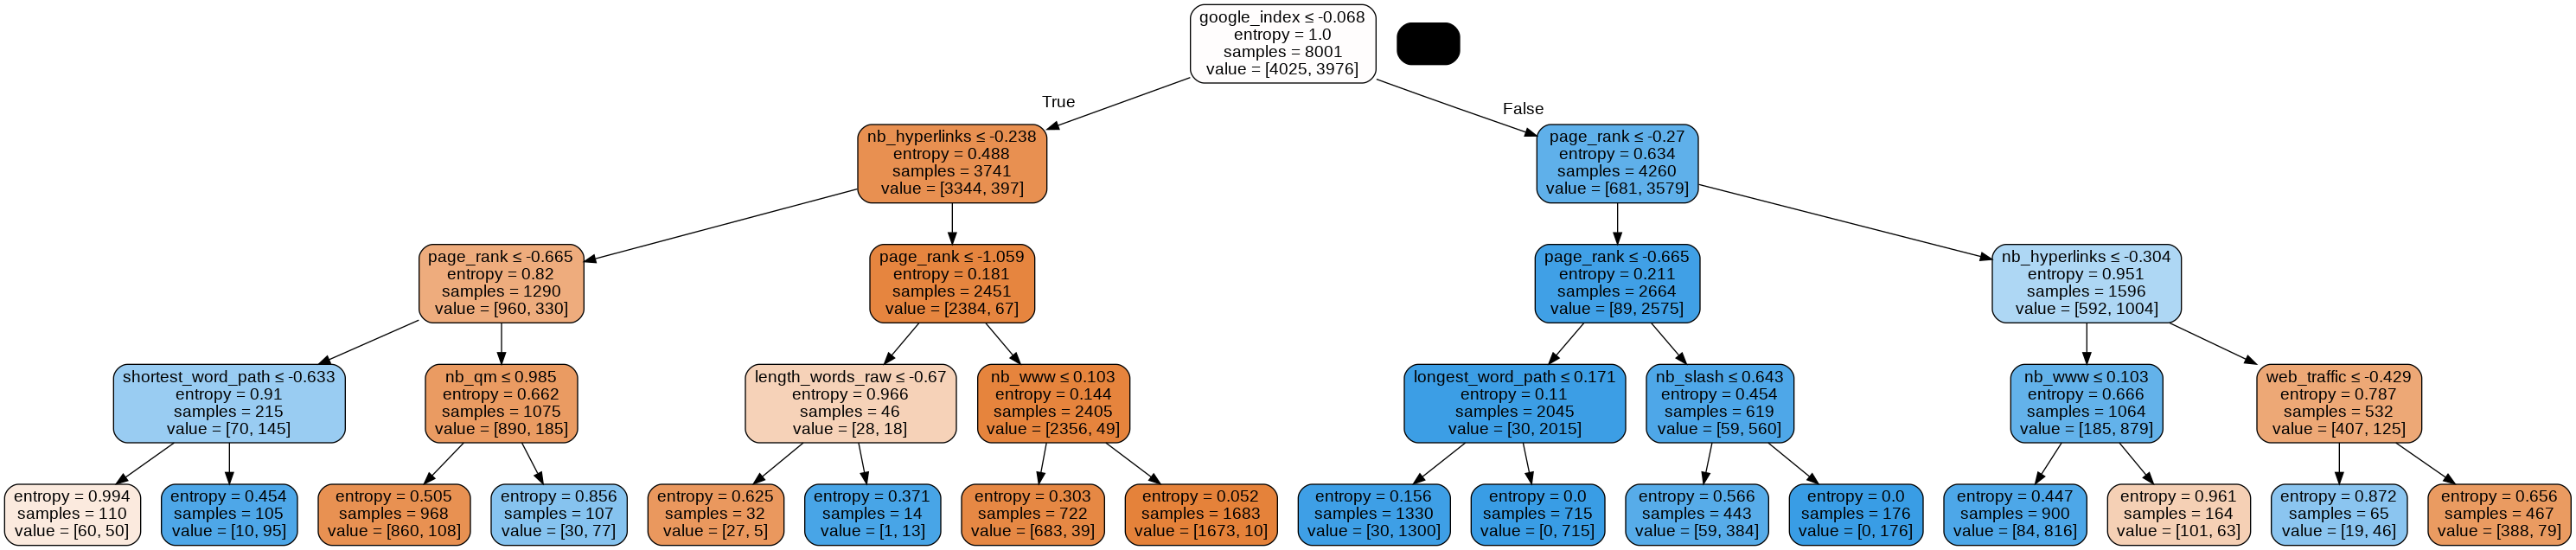

In [77]:
dot_data=StringIO()
export_graphviz(model,out_file=dot_data,feature_names=X.columns,filled=True,rounded=True,special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())